# Predicting Alpha Thalassemia (Genomic Data )

# Introduction :

### An effective screening program to detect Thalassemia carriers is vital to Thalassemia prevention. There are many challenges to an effective screening program, especially in low-resource settings. Considering alpha-thalassemia, genetic testing is needed for a confirmatory diagnosis of a carrier, which is expensive and not widely available. Machine learning (ML) models can act as decision-support tools that are easy to deploy and use in low-resource settings.

## Objective
 ### To develop and train a Machine Learning-based diagnostic pipeline to differentiate Thalassemia Carrier states based on full blood count and/or Haemoglobin variants-first model using the first dataset above will differentiate between normal individuals and alpha thalassemia carriers.

# Problem Statement:
### Predicting cancellation of hotel reservation

# Target Variable :
### The target variable is phenotype 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler



In [2]:
df = pd.read_csv(r"D:\VIT\4thSem\DataScience\Rlang\Alpha-Thalassemia-Dataset-EDA\alphanorm.csv")
df

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.000000,33.000000,309.0,88.500000,2.600000,0.110000,alpha carrier
1,male,10.8,26.6,4.28,62.1,25.3,40.8,19.8,10.3,49.400000,43.100000,687.0,87.800000,2.400000,0.900000,alpha carrier
2,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.000000,33.000000,309.0,88.500000,2.600000,0.100000,alpha carrier
3,male,14.5,43.5,5.17,84.0,28.0,33.4,12.1,11.9,31.000000,50.000000,334.0,86.800000,2.800000,0.300000,alpha carrier
4,male,11.5,34.4,5.02,68.7,22.9,33.4,15.7,20.4,67.000000,30.000000,596.0,86.300000,2.400000,1.300000,alpha carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,male,15.5,45.9,5.19,88.4,29.9,33.8,12.6,8.8,47.565000,40.975000,177.0,88.600000,3.200000,0.400000,normal
199,female,10.4,33.3,4.93,67.6,21.1,31.2,14.8,8.9,44.478378,45.527027,295.0,88.000000,2.400000,0.500000,normal
200,male,9.8,29.8,4.75,62.7,19.0,30.4,14.7,7.2,48.234483,41.537931,262.0,85.100000,2.400000,1.100000,normal
201,male,11.2,37.2,5.43,68.5,20.6,30.1,15.1,12.0,13.500000,76.800000,277.0,86.523291,2.588608,0.769231,normal


## Target Variable 

### Phenotype(Alpha cariier or notmal)

## Dataset Size

In [3]:
df.shape

(203, 16)

In [4]:
df.head()

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.0,33.0,309.0,88.5,2.6,0.11,alpha carrier
1,male,10.8,26.6,4.28,62.1,25.3,40.8,19.8,10.3,49.4,43.1,687.0,87.8,2.4,0.90,alpha carrier
2,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.0,33.0,309.0,88.5,2.6,0.10,alpha carrier
3,male,14.5,43.5,5.17,84.0,28.0,33.4,12.1,11.9,31.0,50.0,334.0,86.8,2.8,0.30,alpha carrier
4,male,11.5,34.4,5.02,68.7,22.9,33.4,15.7,20.4,67.0,30.0,596.0,86.3,2.4,1.30,alpha carrier


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        203 non-null    object 
 1   hb         203 non-null    float64
 2   pcv        203 non-null    float64
 3   rbc        202 non-null    float64
 4   mcv        203 non-null    float64
 5   mch        201 non-null    float64
 6   mchc       203 non-null    float64
 7   rdw        203 non-null    float64
 8   wbc        203 non-null    float64
 9   neut       203 non-null    float64
 10  lymph      203 non-null    float64
 11  plt        203 non-null    float64
 12  hba        203 non-null    float64
 13  hba2       203 non-null    float64
 14  hbf        203 non-null    float64
 15  phenotype  203 non-null    object 
dtypes: float64(14), object(2)
memory usage: 25.5+ KB


In [6]:
df.describe()

,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf
count,203.000000,203.000000,202.000000,203.000000,201.000000,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,12.111823,36.676757,5.057432,74.167128,24.200498,32.497322,14.848380,9.188423,46.08398,43.516162,328.265663,86.515666,2.579554,0.664367
std,1.757800,4.821295,0.585929,9.280344,3.805844,1.979277,2.381027,2.591782,11.79773,11.992417,114.284337,2.436432,0.312889,0.739903
min,7.600000,22.100000,2.410000,47.700000,11.100000,21.100000,10.800000,2.300000,6.20000,10.300000,100.000000,68.000000,0.300000,0.000000
25%,10.900000,33.300000,4.700000,66.950000,21.200000,31.550000,13.300000,7.500000,43.00000,37.000000,256.000000,85.200000,2.500000,0.300000
50%,12.000000,36.000000,5.025000,73.800000,24.100000,32.500000,14.700000,8.915278,47.56500,41.537931,310.000000,86.523291,2.600000,0.537931
75%,13.350000,39.150000,5.437500,81.900000,26.800000,33.446296,15.950000,10.550000,52.15000,46.000000,379.500000,87.365714,2.700000,0.769231
max,16.700000,51.100000,6.770000,91.700000,35.600000,40.800000,28.800000,20.400000,77.50000,87.000000,1107.000000,98.400000,3.300000,5.800000


In [7]:
df.columns

Index(['sex', 'hb', 'pcv', 'rbc', 'mcv', 'mch', 'mchc', 'rdw', 'wbc', 'neut',
       'lymph', 'plt', 'hba', 'hba2', 'hbf', 'phenotype'],
      dtype='object')

In [8]:
df.isnull().sum()

sex          0
hb           0
pcv          0
rbc          1
mcv          0
mch          2
mchc         0
rdw          0
wbc          0
neut         0
lymph        0
plt          0
hba          0
hba2         0
hbf          0
phenotype    0
dtype: int64

In [9]:
print(df.dtypes)

sex           object
hb           float64
pcv          float64
rbc          float64
mcv          float64
mch          float64
mchc         float64
rdw          float64
wbc          float64
neut         float64
lymph        float64
plt          float64
hba          float64
hba2         float64
hbf          float64
phenotype     object
dtype: object


In [10]:
print(df["phenotype"].value_counts())  # Count of each class


phenotype
alpha carrier    148
normal            55
Name: count, dtype: int64


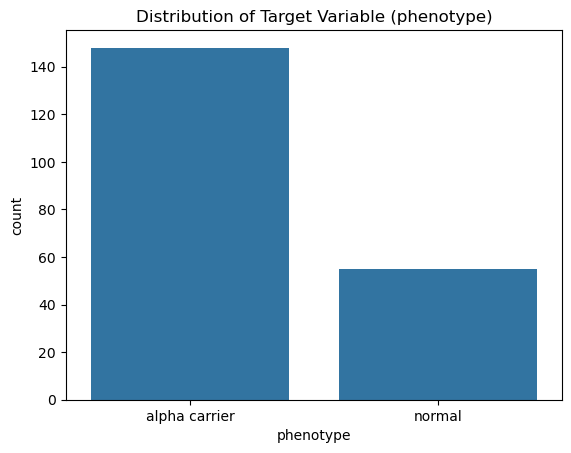

In [11]:
sns.countplot(x="phenotype", data=df)
plt.title("Distribution of Target Variable (phenotype)")
plt.show()

In [12]:
print(df["sex"].unique())  # Unique values in 'sex'
print(df["phenotype"].unique())  # Unique values in 'phenotype'


['female' 'male']
['alpha carrier' 'normal']


## Handeling Null value

In [13]:
# Handling missing values
df["rbc"] = df["rbc"].fillna(df["rbc"].mean())   # Filling missing rbc values with mean
df["mch"] = df["mch"].fillna(df["mch"].mean())   # Filling missing mch values with mean



In [14]:
print(df.isnull().sum())  

sex          0
hb           0
pcv          0
rbc          0
mcv          0
mch          0
mchc         0
rdw          0
wbc          0
neut         0
lymph        0
plt          0
hba          0
hba2         0
hbf          0
phenotype    0
dtype: int64


In [15]:
print(df.dtypes)

sex           object
hb           float64
pcv          float64
rbc          float64
mcv          float64
mch          float64
mchc         float64
rdw          float64
wbc          float64
neut         float64
lymph        float64
plt          float64
hba          float64
hba2         float64
hbf          float64
phenotype     object
dtype: object


In [16]:
df_copy =df.copy()

In [17]:
df_copy.head()

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.0,33.0,309.0,88.5,2.6,0.11,alpha carrier
1,male,10.8,26.6,4.28,62.1,25.3,40.8,19.8,10.3,49.4,43.1,687.0,87.8,2.4,0.90,alpha carrier
2,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.0,33.0,309.0,88.5,2.6,0.10,alpha carrier
3,male,14.5,43.5,5.17,84.0,28.0,33.4,12.1,11.9,31.0,50.0,334.0,86.8,2.8,0.30,alpha carrier
4,male,11.5,34.4,5.02,68.7,22.9,33.4,15.7,20.4,67.0,30.0,596.0,86.3,2.4,1.30,alpha carrier


## Encoding Categorical Variables

In [18]:
df_copy["sex"] = df_copy["sex"].str.strip()
df_copy["phenotype"] = df_copy["phenotype"].str.strip()


In [19]:
df_copy["sex"] = df_copy["sex"].astype(str)
df_copy["phenotype"] = df_copy["phenotype"].astype(str)



In [20]:
df_copy["sex"] = df_copy["sex"].map({"female": 0, "male": 1})
df_copy["phenotype"] = df_copy["phenotype"].map({"normal": 0, "alpha carrier": 1})


In [21]:
print(df_copy[["sex", "phenotype"]].head())


   sex  phenotype
0    0          1
1    1          1
2    0          1
3    1          1
4    1          1


In [22]:
df_copy.head()

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,0,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.0,33.0,309.0,88.5,2.6,0.11,1
1,1,10.8,26.6,4.28,62.1,25.3,40.8,19.8,10.3,49.4,43.1,687.0,87.8,2.4,0.90,1
2,0,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.0,33.0,309.0,88.5,2.6,0.10,1
3,1,14.5,43.5,5.17,84.0,28.0,33.4,12.1,11.9,31.0,50.0,334.0,86.8,2.8,0.30,1
4,1,11.5,34.4,5.02,68.7,22.9,33.4,15.7,20.4,67.0,30.0,596.0,86.3,2.4,1.30,1


In [23]:
print(df_copy.isnull().sum())  

sex          0
hb           0
pcv          0
rbc          0
mcv          0
mch          0
mchc         0
rdw          0
wbc          0
neut         0
lymph        0
plt          0
hba          0
hba2         0
hbf          0
phenotype    0
dtype: int64


In [24]:
print(df_copy.dtypes)

sex            int64
hb           float64
pcv          float64
rbc          float64
mcv          float64
mch          float64
mchc         float64
rdw          float64
wbc          float64
neut         float64
lymph        float64
plt          float64
hba          float64
hba2         float64
hbf          float64
phenotype      int64
dtype: object


In [25]:
print(df_copy.head())  # Agar defined hai to output aayegi


   sex    hb   pcv   rbc   mcv   mch  mchc   rdw   wbc  neut  lymph    plt  \
0    0  10.8  35.2  5.12  68.7  21.2  30.8  13.4   9.6  53.0   33.0  309.0   
1    1  10.8  26.6  4.28  62.1  25.3  40.8  19.8  10.3  49.4   43.1  687.0   
2    0  10.8  35.2  5.12  68.7  21.2  30.8  13.4   9.6  53.0   33.0  309.0   
3    1  14.5  43.5  5.17  84.0  28.0  33.4  12.1  11.9  31.0   50.0  334.0   
4    1  11.5  34.4  5.02  68.7  22.9  33.4  15.7  20.4  67.0   30.0  596.0   

    hba  hba2   hbf  phenotype  
0  88.5   2.6  0.11          1  
1  87.8   2.4  0.90          1  
2  88.5   2.6  0.10          1  
3  86.8   2.8  0.30          1  
4  86.3   2.4  1.30          1  


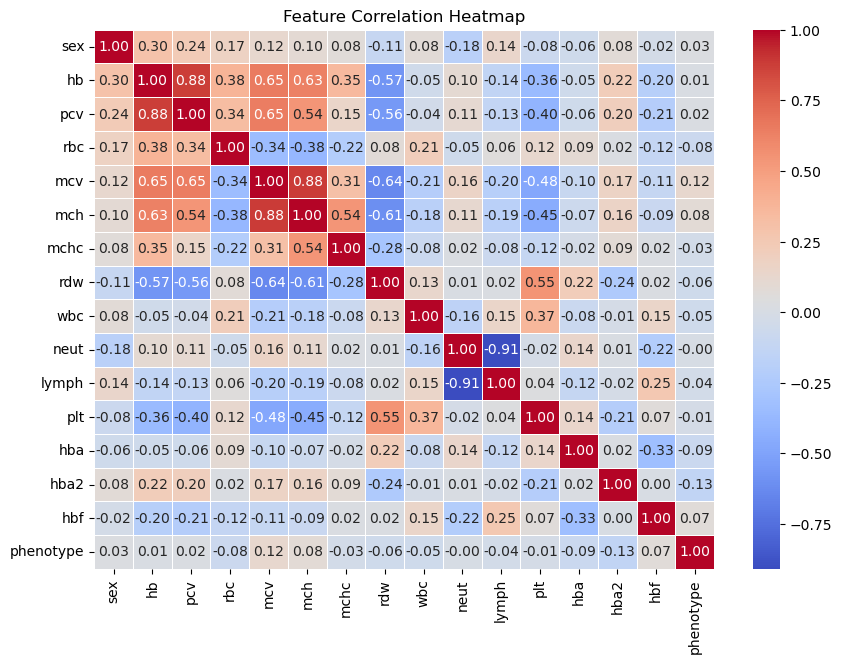

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(df_copy.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [27]:
df_copy.to_csv(r"D:\VIT\4thSem\DataScience\Alpha cleaned copy\cleaned_dataset123.csv", index=False)

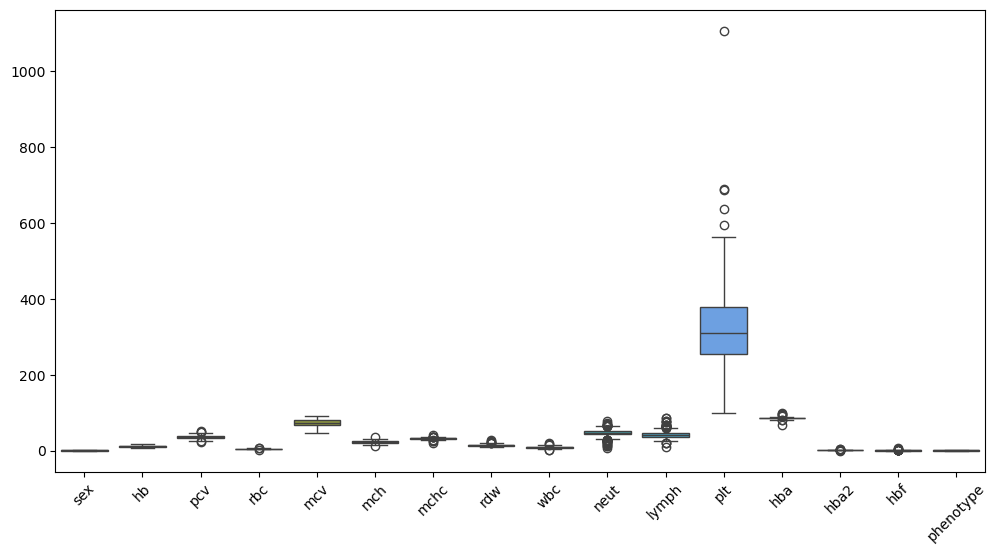

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(12,6))
sns.boxplot(data=df_copy)
plt.xticks(rotation=45)  # Column names ko readable banane ke liye
plt.show()

In [27]:
from scipy.stats.mstats import winsorize

df_copy["plt"] = winsorize(df_copy["plt"], limits=[0.05, 0.05])  # 5% lowest aur highest values adjust karega


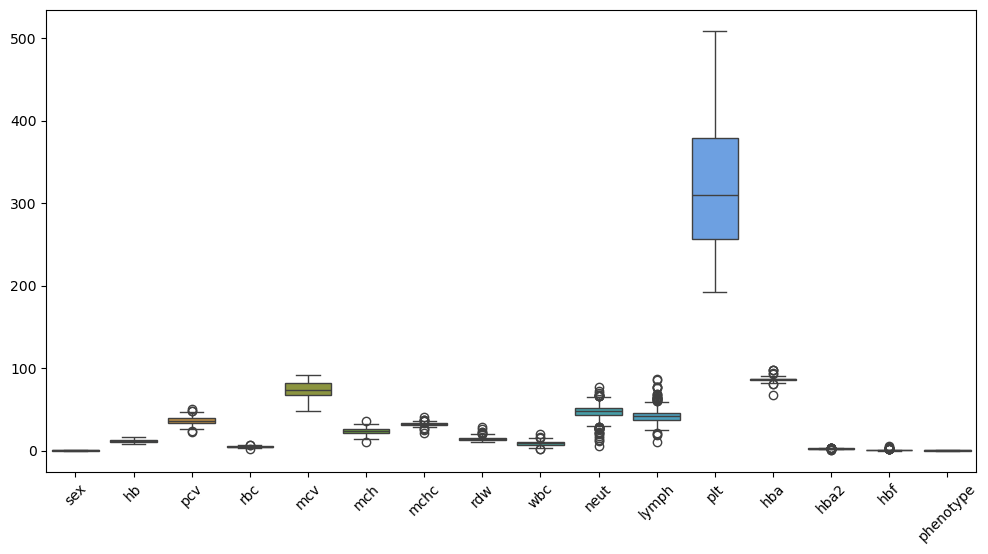

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(12,6))
sns.boxplot(data=df_copy)
plt.xticks(rotation=45)  # Column names ko readable banane ke liye
plt.show()

In [29]:
print(df_copy.head()) 

   sex    hb   pcv   rbc   mcv   mch  mchc   rdw   wbc  neut  lymph    plt  \
0    0  10.8  35.2  5.12  68.7  21.2  30.8  13.4   9.6  53.0   33.0  309.0   
1    1  10.8  26.6  4.28  62.1  25.3  40.8  19.8  10.3  49.4   43.1  509.0   
2    0  10.8  35.2  5.12  68.7  21.2  30.8  13.4   9.6  53.0   33.0  309.0   
3    1  14.5  43.5  5.17  84.0  28.0  33.4  12.1  11.9  31.0   50.0  334.0   
4    1  11.5  34.4  5.02  68.7  22.9  33.4  15.7  20.4  67.0   30.0  509.0   

    hba  hba2   hbf  phenotype  
0  88.5   2.6  0.11          1  
1  87.8   2.4  0.90          1  
2  88.5   2.6  0.10          1  
3  86.8   2.8  0.30          1  
4  86.3   2.4  1.30          1  


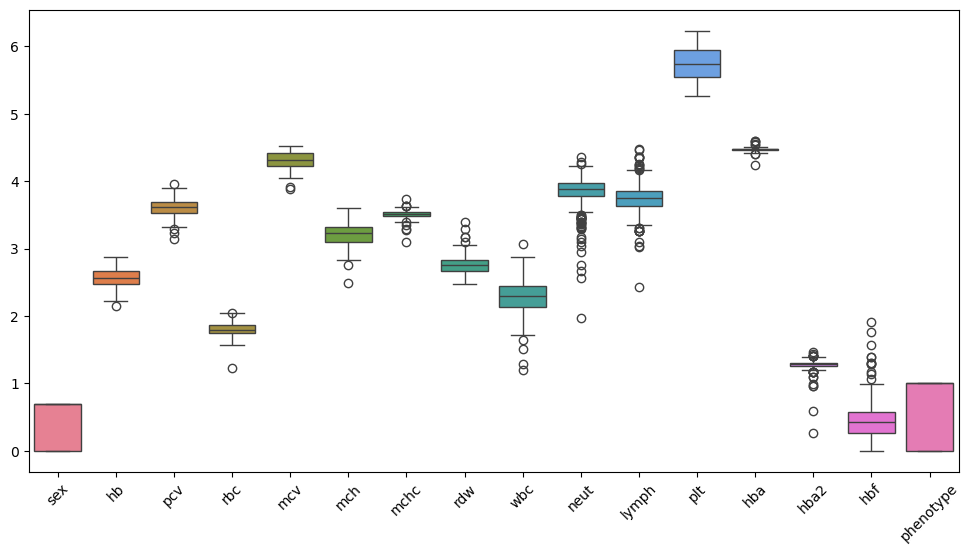

In [30]:
import numpy as np

df_copy_scaled = df_copy.copy()

# Select only numeric columns (excluding categorical ones like 'sex')
numeric_cols = df_copy_scaled.select_dtypes(include=['number']).columns

# Convert all selected numeric columns to float
df_copy_scaled[numeric_cols] = df_copy_scaled[numeric_cols].astype(float)

# Apply log transformation only to numeric columns (excluding the last column)
df_copy_scaled[numeric_cols[:-1]] = np.log1p(df_copy_scaled[numeric_cols[:-1]])

# Plot boxplot again
plt.figure(figsize=(12,6))
sns.boxplot(data=df_copy_scaled)
plt.xticks(rotation=45)
plt.show()


In [31]:
df_copy_scaled = df_copy_scaled.round(2)


In [32]:
numeric_cols = df_copy_scaled.select_dtypes(include=['number']).columns
df_copy_scaled[numeric_cols] = df_copy_scaled[numeric_cols].round(2)


In [33]:
df_copy_scaled['sex'] = df_copy_scaled['sex'].replace(0.69, 1)


In [33]:
print(df_copy_scaled.isnull().sum())  # Shows the count of null values per column


sex          0
hb           0
pcv          0
rbc          0
mcv          0
mch          0
mchc         0
rdw          0
wbc          0
neut         0
lymph        0
plt          0
hba          0
hba2         0
hbf          0
phenotype    0
dtype: int64


In [34]:
print(df_copy_scaled.dtypes)


sex          float64
hb           float64
pcv          float64
rbc          float64
mcv          float64
mch          float64
mchc         float64
rdw          float64
wbc          float64
neut         float64
lymph        float64
plt          float64
hba          float64
hba2         float64
hbf          float64
phenotype    float64
dtype: object


In [35]:
print(df_copy_scaled.duplicated().sum())


1


In [36]:
df_copy_scaled = df_copy_scaled.drop_duplicates()
print(df_copy_scaled.duplicated().sum())

0


In [37]:
df_copy_scaled.shape

(202, 16)

In [38]:
df_copy_scaled.to_csv(r"D:\VIT\4thSem\DataScience\Alpha cleaned copy\cleaned_dataset2.csv", index=False)

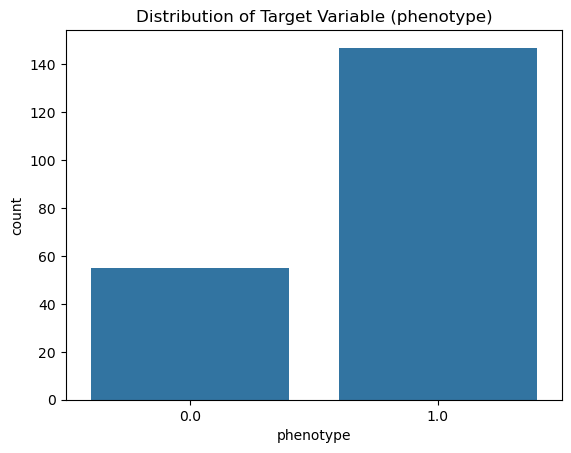

In [39]:
sns.countplot(x="phenotype", data=df_copy_scaled)
plt.title("Distribution of Target Variable (phenotype)")
plt.show()

### Target Variable Distribution (phenotype):

Alpha carrier: 148 samples
Normal: 55 samples
The dataset is imbalanced, with a higher number of alpha carriers.
Next Steps: Consider handling imbalance using techniques like SMOTE, class weighting, or downsampling. 

## Oversampling using SMOTE (Synthetic Minority Over-sampling Technique)

In [40]:
df_smote  = df_copy_scaled.copy()

In [41]:
df_smote

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,0.00,2.47,3.59,1.81,4.24,3.10,3.46,2.67,2.36,3.99,3.53,5.74,4.49,1.28,0.10,1.0
1,0.69,2.47,3.32,1.66,4.14,3.27,3.73,3.03,2.42,3.92,3.79,6.23,4.49,1.22,0.64,1.0
3,0.69,2.74,3.80,1.82,4.44,3.37,3.54,2.57,2.56,3.47,3.93,5.81,4.48,1.34,0.26,1.0
4,0.69,2.53,3.57,1.80,4.24,3.17,3.54,2.82,3.06,4.22,3.43,6.23,4.47,1.22,0.83,1.0
5,0.69,2.70,3.78,1.79,4.48,3.37,3.51,2.56,2.58,4.01,3.67,5.47,4.45,1.30,0.43,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0.69,2.80,3.85,1.82,4.49,3.43,3.55,2.61,2.28,3.88,3.74,5.26,4.50,1.44,0.34,0.0
199,0.00,2.43,3.54,1.78,4.23,3.10,3.47,2.76,2.29,3.82,3.84,5.69,4.49,1.22,0.41,0.0
200,0.69,2.38,3.43,1.75,4.15,3.00,3.45,2.75,2.10,3.90,3.75,5.57,4.46,1.22,0.74,0.0
201,0.69,2.50,3.64,1.86,4.24,3.07,3.44,2.78,2.56,2.67,4.35,5.63,4.47,1.28,0.57,0.0


In [42]:
from imblearn.over_sampling import SMOTE

# Define X (features) and y (target)
X = df_smote.drop(columns=['phenotype'])  # Exclude target variable
y = df_smote['phenotype']

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['phenotype'] = y_resampled

# Check the new class distribution
print(df_balanced['phenotype'].value_counts())


phenotype
1.0    147
0.0    147
Name: count, dtype: int64


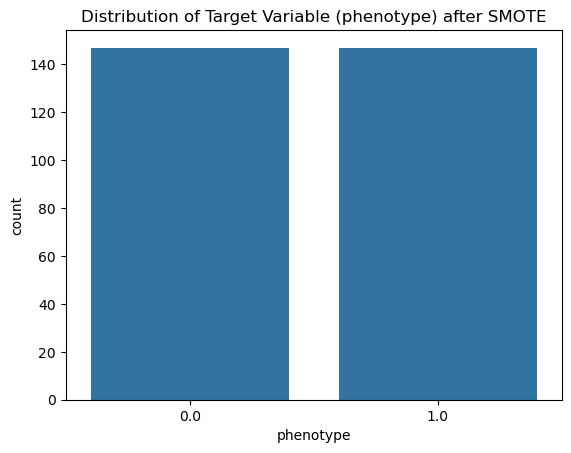

In [43]:
sns.countplot(x="phenotype", data=df_balanced)
plt.title("Distribution of Target Variable (phenotype) after SMOTE")
plt.show()


In [44]:
df_balanced.shape

(294, 16)

## Visualization

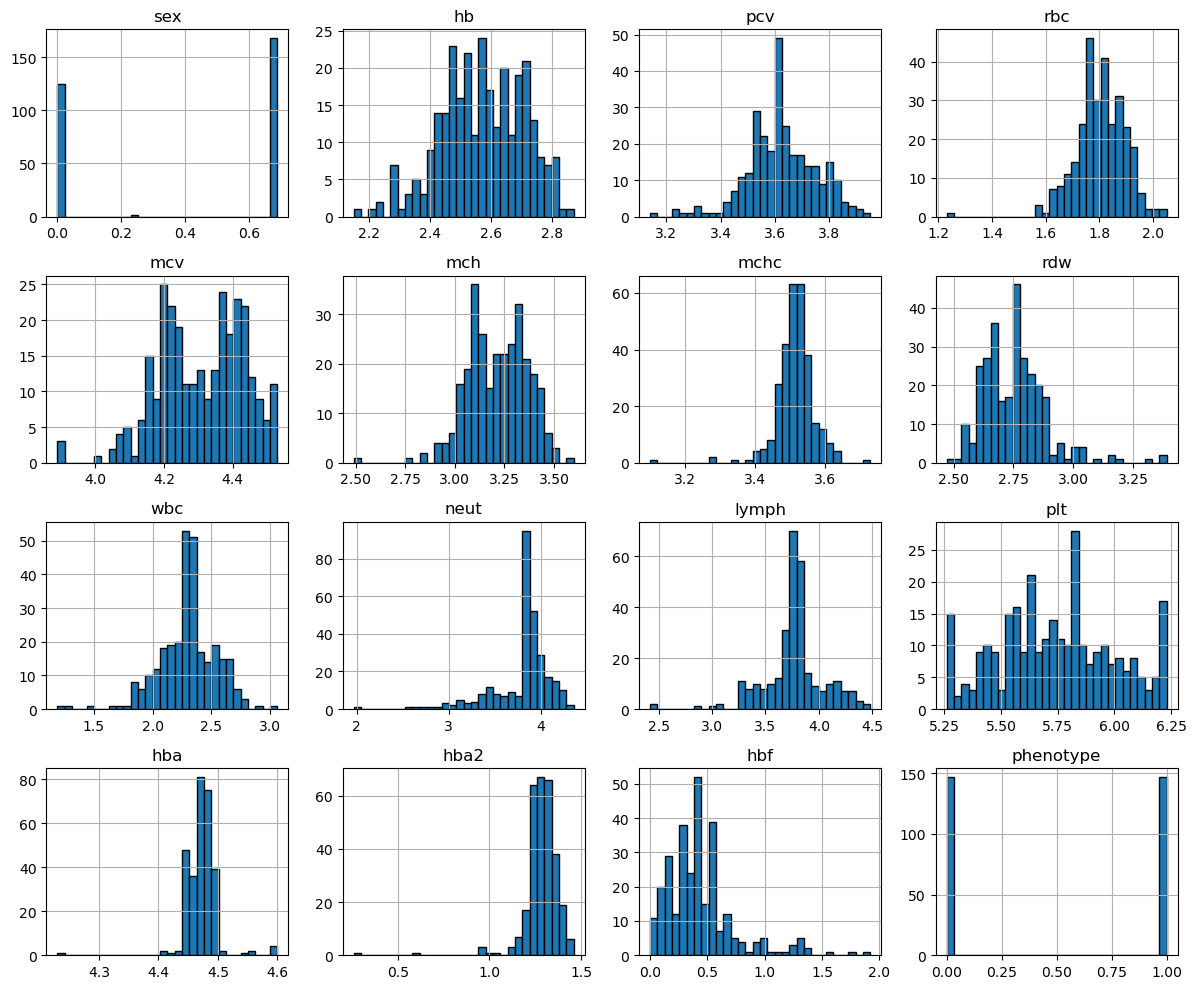

In [45]:
import matplotlib.pyplot as plt

df_balanced.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


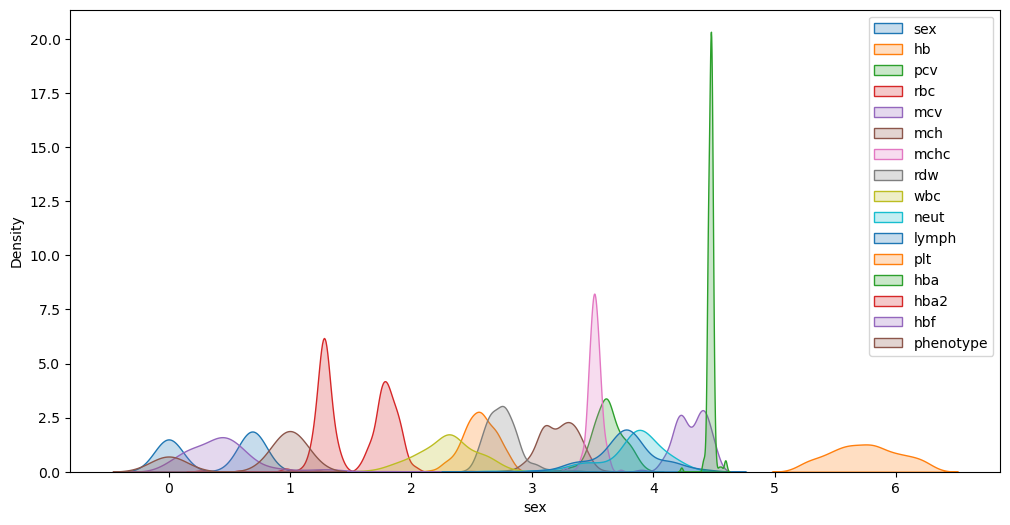

In [46]:
import seaborn as sns

plt.figure(figsize=(12, 6))
for col in df_balanced.select_dtypes(include=['float64', 'int64']).columns:
    sns.kdeplot(df_copy_scaled[col], label=col, fill=True)
plt.legend()
plt.show()


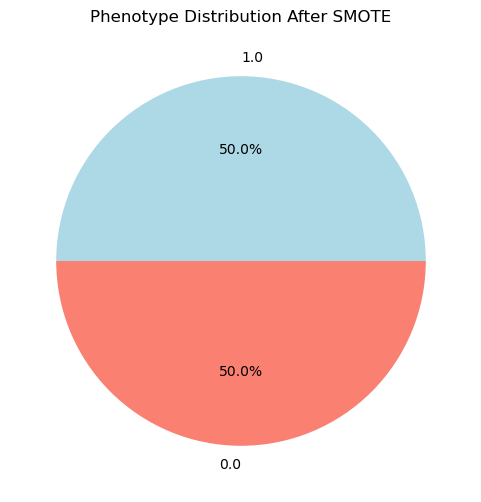

In [47]:
# Pie Chart for Phenotype Distribution
plt.figure(figsize=(6,6))
df_balanced['phenotype'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Phenotype Distribution After SMOTE")
plt.ylabel('')  # Remove y-label for better visualization
plt.show()


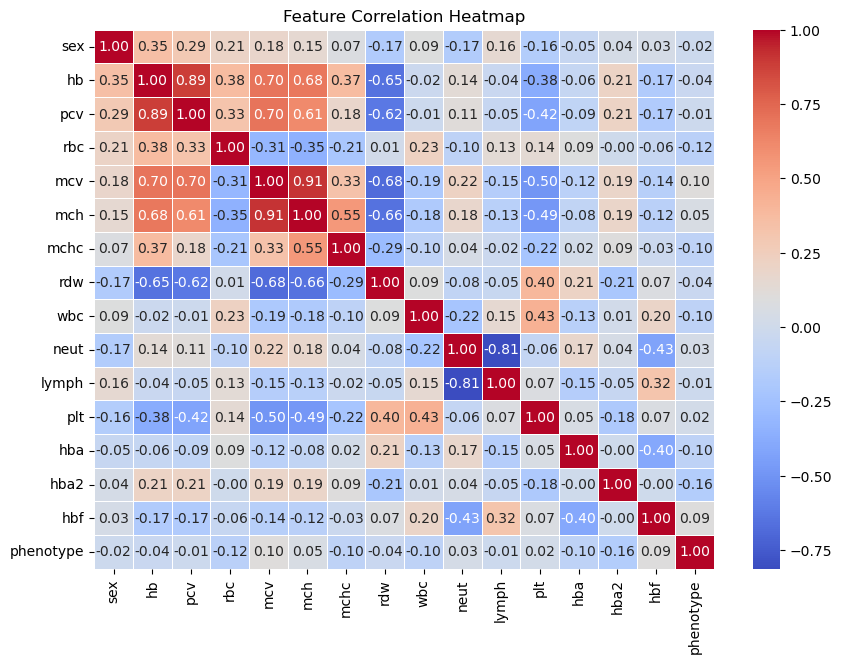

In [48]:
# Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_balanced.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


###
This correlation heatmap visualizes the relationships between numerical features in the dataset using the Pearson correlation coefficient, which ranges from -1 to 1. A high positive value means both variables increase together, while a high negative value indicates an inverse relationship. Features like hemoglobin and packed cell volume (0.89), as well as mean corpuscular volume and mean corpuscular hemoglobin (0.91), show strong positive correlations, meaning they tend to increase or decrease together. Negative correlations, such as red cell distribution width and hemoglobin (-0.65) or platelet count and mean corpuscular volume (-0.50), suggest that when one increases, the other decreases. The phenotype variable exhibits weak correlations with all features, indicating that no single numerical variable strongly determines it in a linear fashion. This suggests the need for non-linear modeling techniques, feature selection to reduce redundancy, and potentially new feature engineering approaches to improve predictive performance.

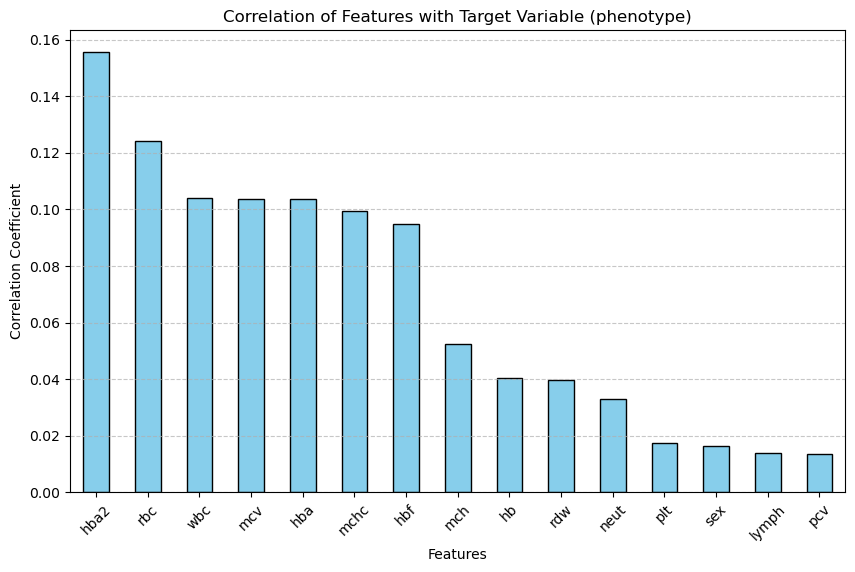

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate correlation with phenotype
correlation = df_balanced.corr()["phenotype"].drop("phenotype")  # Dropping phenotype itself

# Sort by absolute correlation values (strongest impact at top)
correlation_sorted = correlation.abs().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
correlation_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Correlation of Features with Target Variable (phenotype)")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 
This bar chart represents the correlation between various independent variables and the dependent variable, phenotype. Correlation values range from -1 to +1, where a higher absolute value indicates a stronger relationship between the variable and the target.

In this chart, the feature "mcv" has the highest correlation with phenotype, meaning it has the most influence compared to other factors. Following closely, "hba2" and "hba" also show significant correlations, suggesting that these features play a crucial role in determining the phenotype. Other variables such as "hbf," "mch," "rbc," and "wbc" exhibit moderate correlations, meaning they also contribute to phenotype determination but to a lesser extent than the top variables.

As the bars move further right, the correlation values decrease, indicating weaker relationships between those features and the phenotype. Variables like "plt" and "lymph" have very low correlation values, meaning they have little to no direct impact on phenotype.

The correlation values in this visualization help in feature selection for predictive modeling. Variables with higher absolute correlation values are more important for phenotype prediction, while those with very low correlation may be less relevant and can potentially be removed to simplify the model.









In [50]:
dataset = df_balanced.copy()

In [51]:
dataset

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,0.00,2.470000,3.590000,1.810000,4.240000,3.100000,3.460000,2.670000,2.360000,3.990000,3.530000,5.740000,4.490000,1.280000,0.100000,1.0
1,0.69,2.470000,3.320000,1.660000,4.140000,3.270000,3.730000,3.030000,2.420000,3.920000,3.790000,6.230000,4.490000,1.220000,0.640000,1.0
2,0.69,2.740000,3.800000,1.820000,4.440000,3.370000,3.540000,2.570000,2.560000,3.470000,3.930000,5.810000,4.480000,1.340000,0.260000,1.0
3,0.69,2.530000,3.570000,1.800000,4.240000,3.170000,3.540000,2.820000,3.060000,4.220000,3.430000,6.230000,4.470000,1.220000,0.830000,1.0
4,0.69,2.700000,3.780000,1.790000,4.480000,3.370000,3.510000,2.560000,2.580000,4.010000,3.670000,5.470000,4.450000,1.300000,0.430000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.69,2.705589,3.805127,1.860820,4.406051,3.278256,3.490462,2.796975,2.721535,3.910820,3.831744,5.545231,4.453487,1.319180,0.386408,0.0
290,0.00,2.433091,3.527638,1.830000,4.150728,3.026181,3.492362,2.819822,2.339450,3.828916,3.799450,5.993269,4.480000,1.369272,0.100000,0.0
291,0.00,2.239337,3.257071,1.736520,4.006021,2.930551,3.536133,3.200500,2.038398,4.070775,3.461102,5.970887,4.553592,1.048949,0.069612,0.0
292,0.69,2.597592,3.645694,1.767469,4.345694,3.281389,3.545694,2.820509,2.346204,3.823796,3.833673,5.573164,4.470633,1.408735,0.180000,0.0


In [52]:
dataset.to_csv(r"D:\VIT\4thSem\DataScience\Alpha cleaned copy\cleaned_dataset_before_mode2.csv", index=False)

PermissionError: [Errno 13] Permission denied: 'D:\\VIT\\4thSem\\DataScience\\Alpha cleaned copy\\cleaned_dataset_before_mode2.csv'

### Data Sampling : Splitting into train and test

In [53]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'phenotype' is the target variable
X = dataset.drop(columns=['phenotype'])  # Independent variables
y = dataset['phenotype']  # Target variable

# Splitting into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the splits
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (235, 15) (235,)
Testing set: (59, 15) (59,)


# Model Training

### import StandardScaler and Apply Scaling

In [54]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set (use the same scaler)
X_test_scaled = scaler.transform(X_test)


### Logicstic Regression Model

In [55]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression()
# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test_scaled)



In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.559322033898305
Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      0.70      0.59        27
         1.0       0.64      0.44      0.52        32

    accuracy                           0.56        59
   macro avg       0.57      0.57      0.56        59
weighted avg       0.58      0.56      0.55        59

Confusion Matrix:
 [[19  8]
 [18 14]]


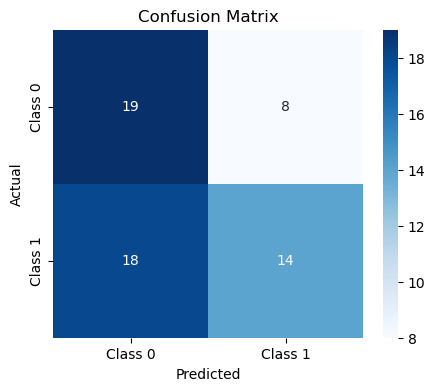

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [58]:
log_reg = LogisticRegression(class_weight='balanced')


In [59]:
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced')

In [60]:
y_pred = log_reg.predict(X_test_scaled)


In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.559322033898305
Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      0.67      0.58        27
         1.0       0.62      0.47      0.54        32

    accuracy                           0.56        59
   macro avg       0.57      0.57      0.56        59
weighted avg       0.57      0.56      0.56        59

Confusion Matrix:
 [[18  9]
 [17 15]]


## Random forest

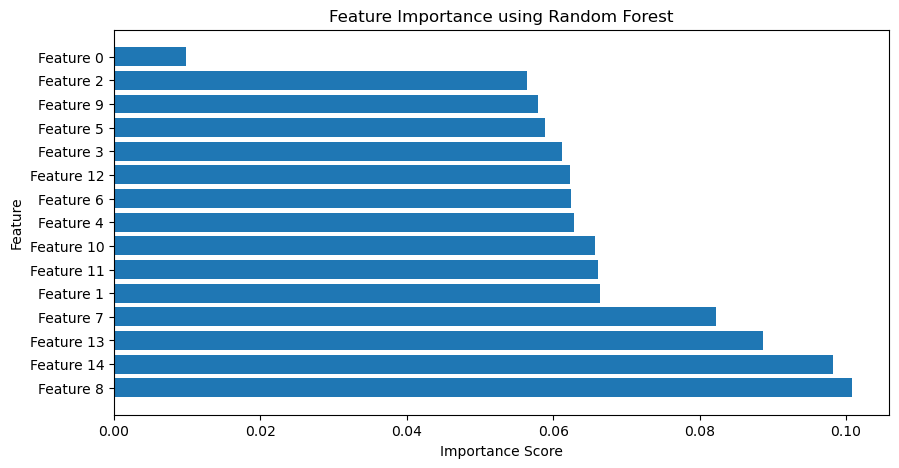

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)

# Feature importance extract karna
feature_importances = rf.feature_importances_

# Check if X_train_scaled is a DataFrame or NumPy array
if isinstance(X_train_scaled, np.ndarray):  
    feature_names = [f'Feature {i}' for i in range(X_train_scaled.shape[1])]  # Generic names
else:  
    feature_names = X_train_scaled.columns  # Original column names if DataFrame

# Feature names ke saath importance ko sort karna
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot karna
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')
plt.show()


In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)



In [64]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.7796610169491526
Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.93      0.79        27
         1.0       0.91      0.66      0.76        32

    accuracy                           0.78        59
   macro avg       0.80      0.79      0.78        59
weighted avg       0.81      0.78      0.78        59

Confusion Matrix:
 [[25  2]
 [11 21]]


### hyperprameter

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [5, 10, None],  
    'class_weight': ['balanced', 'balanced_subsample'],  
    'min_samples_split': [2, 5, 10]
}



# Create model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7796610169491526
Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.93      0.79        27
         1.0       0.91      0.66      0.76        32

    accuracy                           0.78        59
   macro avg       0.80      0.79      0.78        59
weighted avg       0.81      0.78      0.78        59

Confusion Matrix:
 [[25  2]
 [11 21]]


In [66]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")


Random Forest Accuracy: 77.97%


# decision tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)

# Train the model on selected features
dt.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = dt.predict(X_train_scaled)
y_test_pred = dt.predict(X_test_scaled)

# Accuracy
train_accuracy_dt = accuracy_score(y_train, y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)

print("Train Accuracy (Decision Tree):", train_accuracy_dt)
print("Test Accuracy (Decision Tree):", test_accuracy_dt)


Train Accuracy (Decision Tree): 1.0
Test Accuracy (Decision Tree): 0.6610169491525424


In [68]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.78      0.68        27
         1.0       0.75      0.56      0.64        32

    accuracy                           0.66        59
   macro avg       0.68      0.67      0.66        59
weighted avg       0.68      0.66      0.66        59



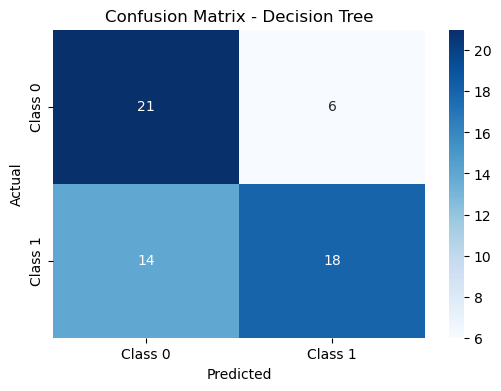

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


In [70]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")


Decision Tree Accuracy: 55.93%


# Svm

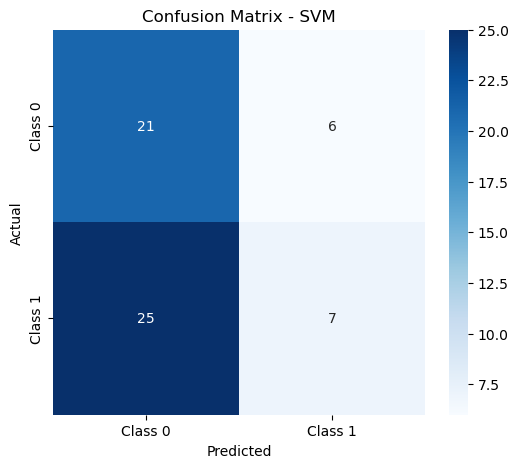

              precision    recall  f1-score   support

         0.0       0.46      0.78      0.58        27
         1.0       0.54      0.22      0.31        32

    accuracy                           0.47        59
   macro avg       0.50      0.50      0.44        59
weighted avg       0.50      0.47      0.43        59



In [71]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Train the SVM model
svm_model = SVC(kernel='linear', C=1.0)  # You can try 'rbf', 'poly', or 'sigmoid' kernels
svm_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_svm = svm_model.predict(X_test)

# Step 3: Compute the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Step 4: Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# Step 5: Print classification report
print(classification_report(y_test, y_pred_svm))


In [72]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')


In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [74]:
svm_model = SVC(kernel='linear', class_weight='balanced')


In [75]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train the improved SVM model
svm_model = SVC(kernel='rbf', class_weight='balanced', C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test_scaled)


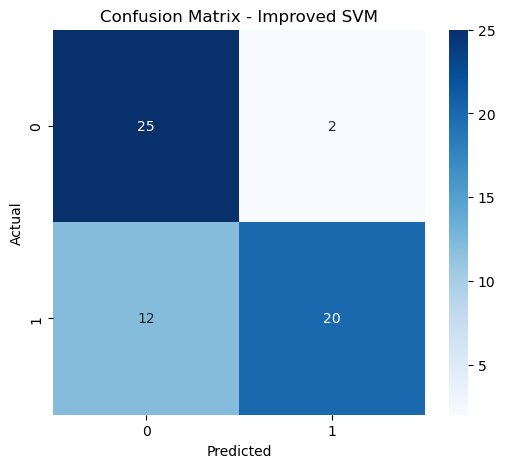

              precision    recall  f1-score   support

         0.0       0.68      0.93      0.78        27
         1.0       0.91      0.62      0.74        32

    accuracy                           0.76        59
   macro avg       0.79      0.78      0.76        59
weighted avg       0.80      0.76      0.76        59



In [76]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Improved SVM")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))


In [77]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 76.27%


In [84]:
evaluation_df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'KNN'],
    'F1 Score': [rfc_f1, dt_f1, log_f1, knn_f1],
    'Recall': [rfc_recall, dt_recall, log_recall, knn_recall],
    'Accuracy': [rfc_acc, dt_acc, log_acc, knn_acc],
    'Precision': [rfc_precision, dt_precision, log_precision, knn_precision]
})

evaluation_df

NameError: name 'rfc_f1' is not defined